In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

In [2]:
path = "/Users/elijahwoolford/Desktop/python /amazon_cells_labelled.txt"
path2 = "/Users/elijahwoolford/Desktop/python /yelp_labelled.txt"

df = pd.read_csv(path, delimiter= '\t', header=None)
df2 = pd.read_csv(path, delimiter= '\t', header=None)
datasets = [df,df2]
df = pd.concat(datasets)
df.columns = ["message", "binary"]
df.head()

,message,binary
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
#Feature 1: Positive words

df_positive = pd.DataFrame()
positive_words = ["great", "good", "loved", "right", "well", "excellent", "nice", "all", "easy", "loves", "love"]
for word in positive_words:
    df_positive[str(word)] = df.message.str.contains(str(word), case=False)
df_positive.head()

,great,good,loved,right,well,excellent,nice,all,easy,loves,love
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False


In [4]:
df_positive["positive_message"] = (df["binary"] == 1)

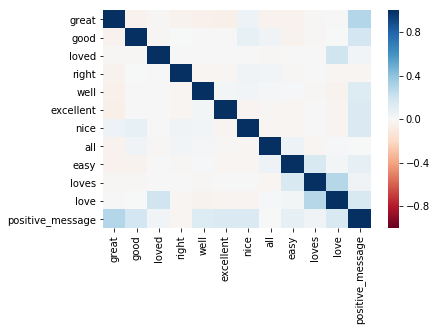

In [5]:
sns.heatmap(df_positive.corr(), cmap="RdBu", vmin=-1)

In [6]:
data = df_positive[positive_words]
target = df_positive["positive_message"]

In [7]:
bnb = BernoulliNB()
bnb.fit(data,target)
pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != pred).sum()
))


Number of mislabeled points out of a total 2000 points : 566


In [8]:
cross_val_score(bnb, data, target, cv=10)

array([0.775, 0.74 , 0.69 , 0.68 , 0.7  , 0.775, 0.74 , 0.69 , 0.68 ,
       0.7  ])

In [9]:
#Feature 2: Negative words

df_negative = pd.DataFrame()
negative_words = ['average', 'bad', 'problem', 'avoid', 'waste', 'angry',
           'horrible', 'gross', 'mediocre', 'rude', 'disappointed', 'sad', 'not', 
           'lacks', 'terrible', 'worse', 'worst', 'sucked', 'awful']

for word in negative_words:
    df_negative[str(word)] = df.message.str.contains(str(word), case=False)
df_negative.head()

,average,bad,problem,avoid,waste,angry,horrible,gross,mediocre,rude,disappointed,sad,not,lacks,terrible,worse,worst,sucked,awful
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_negative["negative_message"] = (df["binary"] == 0)

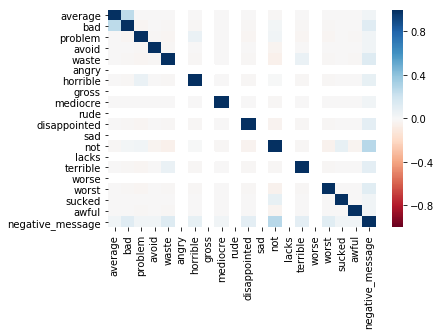

In [11]:
sns.heatmap(df_negative.corr(), cmap="RdBu", vmin=-1)

In [12]:
data1 = df_negative[negative_words]
target1 = df_negative["negative_message"]

In [13]:
bnb1 = BernoulliNB()
bnb1.fit(data1,target1)
pred = bnb1.predict(data1)
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != pred).sum()
))

Number of mislabeled points out of a total 2000 points : 672


In [14]:
cross_val_score(bnb1, data1, target1, cv=10)

array([0.66 , 0.68 , 0.65 , 0.635, 0.66 , 0.66 , 0.68 , 0.65 , 0.635,
       0.66 ])

Seems that having negative words as features actually makes the model worse.

In [15]:
#Feature 3: More positive words

df_positive1 = pd.DataFrame()
positive_words1 = ["great", "good", "loved", "right", "well", "excellent", "nice", "all", "easy", "easier", 
                   "loves", "love", "cool", "cheaper", "happy", "clear"]
for word in positive_words1:
    df_positive1[str(word)] = df.message.str.contains(str(word), case=False)
df_positive1.head()

,great,good,loved,right,well,excellent,nice,all,easy,easier,loves,love,cool,cheaper,happy,clear
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df_positive1["positive_message"] = (df["binary"] == 1)

In [17]:
data2 = df_positive1[positive_words1]
target2 = df_positive1["positive_message"]


In [18]:
bnb2 = BernoulliNB()
bnb2.fit(data2,target2)
pred = bnb2.predict(data2)
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != pred).sum()
))


Number of mislabeled points out of a total 2000 points : 536


In [19]:
cross_val_score(bnb2, data2, target2, cv=10)

array([0.765, 0.755, 0.71 , 0.695, 0.735, 0.765, 0.755, 0.71 , 0.695,
       0.735])

Adding more positive words increased the accuracy of the model.

In [20]:
#Feature 4: Less negative words

df_negative1 = pd.DataFrame()
negative_words1 = ['bad', 'problem', 'avoid', 'waste', 'angry','horrible','disappointed', 
                   'sad', 'not', 'lacks', 'terrible', 'worse', 'worst','awful']

for word in negative_words1:
    df_negative1[str(word)] = df.message.str.contains(str(word), case=False)
df_negative1.head()

,bad,problem,avoid,waste,angry,horrible,disappointed,sad,not,lacks,terrible,worse,worst,awful
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df_negative1["negative_message"] = (df["binary"] == 0)

In [22]:
data3 = df_negative1[negative_words1]
target3 = df_negative1["negative_message"]

In [23]:
bnb3 = BernoulliNB()
bnb3.fit(data3,target3)
pred = bnb3.predict(data3)
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != pred).sum()
))


Number of mislabeled points out of a total 2000 points : 674


In [30]:
cross_val_score(bnb3, data3, target3, cv=10)

array([0.66, 0.68, 0.65, 0.63, 0.66, 0.66, 0.68, 0.65, 0.63, 0.66])

In [25]:
#Feature 5: Combo words

df_combo = pd.DataFrame()
pos_words = ["great", "good", "loved", "right", "well", "excellent", "nice", "all", "easy", "easier", 
                   "loves", "love", "cool", "cheaper", "happy", "clear"]
neg_words = ['average', 'bad', 'problem', 'avoid', 'waste', 'angry',
           'horrible', 'gross', 'mediocre', 'rude', 'disappointed', 'sad', 'not', 
           'lacks', 'terrible', 'worse', 'worst', 'sucked', 'awful']
for word in pos_words:
    df_combo[str(word)] = df.message.str.contains(str(word), case=False)
for word in neg_words:
    df_combo[str(word)] = df.message.str.contains(str(word), case=False)
df_combo.head()

,great,good,loved,right,well,excellent,nice,all,easy,easier,...,rude,disappointed,sad,not,lacks,terrible,worse,worst,sucked,awful
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
df_combo["pos_message"] = (df["binary"] == 1)
df_combo["neg_message"] = ((df["binary"] == 1) == False)

In [81]:
data4 = df_combo[pos_words+neg_words]
target4 = df_combo["pos_message"] | df_combo["neg_message"]

In [82]:
bnb4 = BernoulliNB()
bnb4.fit(data4,target4)
pred = bnb4.predict(data4)
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != pred).sum()
))

Number of mislabeled points out of a total 2000 points : 510


In [74]:
cross_val_score(bnb4, data4, target4, cv=10)

array([0.77 , 0.775, 0.715, 0.71 , 0.75 , 0.77 , 0.775, 0.715, 0.71 ,
       0.75 ])

A combination of positive and negative words has made the model slightly more accurate. Also there isnt any overfitting in any of the above classifiers. 